<a href="https://colab.research.google.com/github/keeponing/py2_aider/blob/main/04_%E9%96%8B%E7%99%BA/04_05_jockey_%E3%82%A2%E3%83%AB%E3%82%B4%E3%83%AA%E3%82%BA%E3%83%A0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!apt updateapt update
!pip install mdbtools-dev
!apt-get install mdbtools
!pip install pandas pyodbc
!pip install tempfile2
import warnings
warnings.filterwarnings('ignore')

E: Invalid operation updateapt
ERROR: Could not find a version that satisfies the requirement mdbtools-dev (from versions: none)
ERROR: No matching distribution found for mdbtools-dev
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
mdbtools is already the newest version (1.0.0+dfsg-1).
0 upgraded, 0 newly installed, 0 to remove and 18 not upgraded.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Dev/py2/')
import numpy as np

import pandas as pd
from google.colab import files
import os
import subprocess
from io import StringIO  # StringIOを正しくインポート
import model.utility.k_analysis_util as k_a_util
from IPython.display import display

from google.colab import drive
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:

# 使用例
table_name = 'JockeyScore'  # テーブル名を指定

years = range(2000, 2026)

k_a_util.prepare_pd_on_notebook()

dict_statistics={}
filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_score.accdb'
df_summary = k_a_util.read_table(filepath, table_name)
df_summary = df_summary.sort_values(by='js_year')



In [5]:
df_summary.head()

,js_id,js_year,js_race_count,js_win_score,js_mul_score,js_win_count,js_mul_count
0,00000,2000,25620,0.097150661,0.2905933,2489,7445
4348,05098,2000,10,0.1,0.1,1,1
4361,05099,2000,2,0,0,0,0
4364,05100,2000,7,0,0,0,0
4367,05101,2000,4,0,0.5,0,2


In [6]:
df_group_y = df_summary.groupby('js_year')
for key, group in df_group_y:
  print(group.head())

      js_id js_year js_race_count js_win_score js_mul_score js_win_count js_mul_count
0     00000    2000         25620  0.097150661    0.2905933         2489         7445
4348  05098    2000            10          0.1          0.1            1            1
4361  05099    2000             2            0            0            0            0
4364  05100    2000             7            0            0            0            0
4367  05101    2000             4            0          0.5            0            2
      js_id js_year js_race_count js_win_score js_mul_score js_win_count js_mul_count
56    00403    2001            12            0            0            0            0
2134  01041    2001           182  0.027472528   0.12087912            5           22
4383  05103    2001             3            0            0            0            0
1652  01011    2001           492  0.067073174   0.22357723           33          110
4876  05277    2001             4            0        

In [7]:


df_group_y = df_summary.groupby('js_year')
for key, group in df_group_y:
  # Sort the group by 'js_win_score' in descending order
  sorted_group = group.sort_values(by='js_win_score', ascending=False)
  print(sorted_group.head())


      js_id js_year js_race_count js_win_score js_mul_score js_win_count js_mul_count
4774  05245    2000             1            1            1            1            1
4788  05253    2000             2          0.5          0.5            1            1
4190  05055    2000             3   0.33333334   0.33333334            1            1
4296  05091    2000             7    0.2857143   0.42857143            2            3
292   00606    2000             4         0.25         0.25            1            1
      js_id js_year js_race_count js_win_score js_mul_score js_win_count js_mul_count
4872  05275    2001             2          0.5          0.5            1            1
28    00164    2001             3   0.33333334   0.66666669            1            2
5002  05310    2001             3   0.33333334            1            1            3
4944  05299    2001             5          0.2          0.2            1            1
173   00429    2001             5          0.2        

In [ ]:

# k_a_util.prepare_pd_on_notebook()

# dict_statistics = {}
# filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_score.accdb'
# df_summary = k_a_util.read_table(filepath, table_name)
# df_summary = df_summary[df_summary['js_id'] != '00000']
# df_summary = df_summary.sort_values(by='js_year')


# df_group_y = df_summary.groupby('js_year')

# for year, group in df_group_y:
#     plt.figure(figsize=(36, 3))  # Create a new figure for each year
#     group['js_race_count'] = group['js_race_count'].astype(int)
#     group = group.sort_values(by='js_race_count')  # Sort by js_race_count in ascending order
#     sns.histplot(group['js_race_count'], bins=30, kde=True)
#     plt.title(f'Histogram of js_race_count for {year}')
#     plt.xlabel('js_race_count')
#     plt.ylabel('Frequency')
#     plt.xticks(fontsize=10)  # Rotate X-axis labels by 90 degrees
#     plt.show()


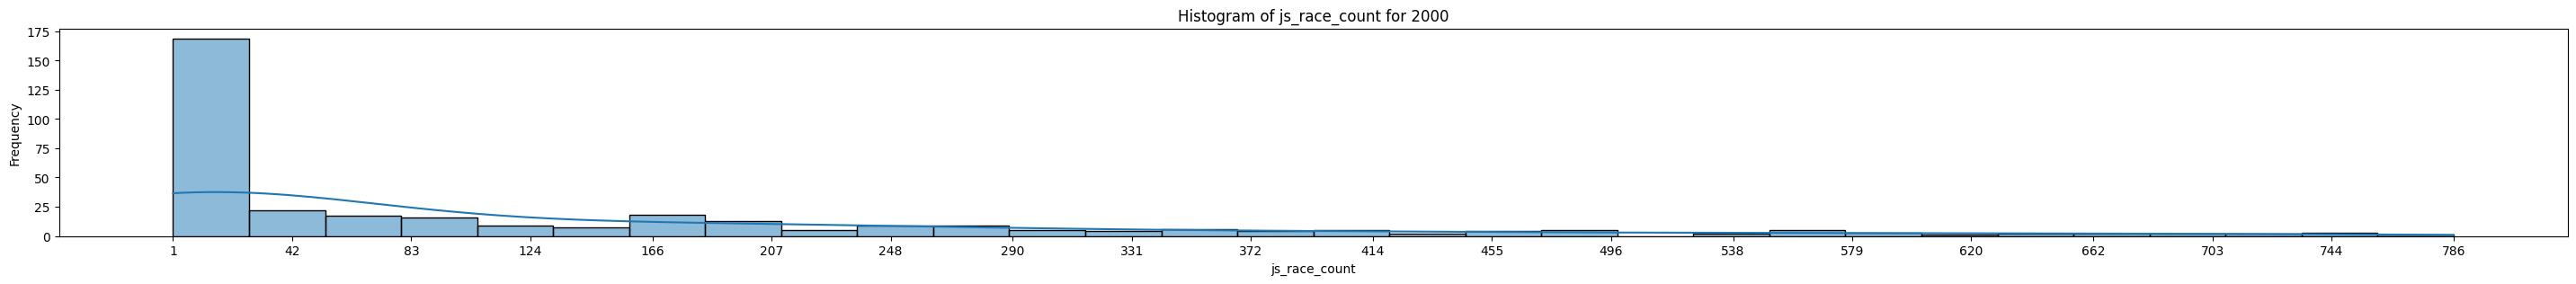

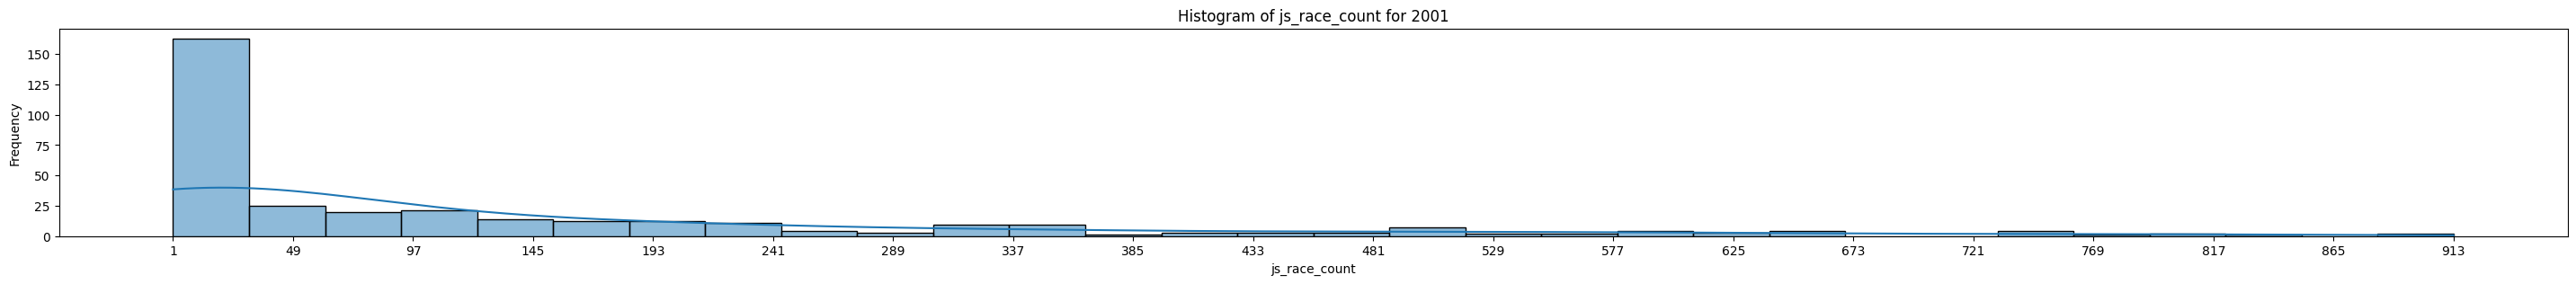

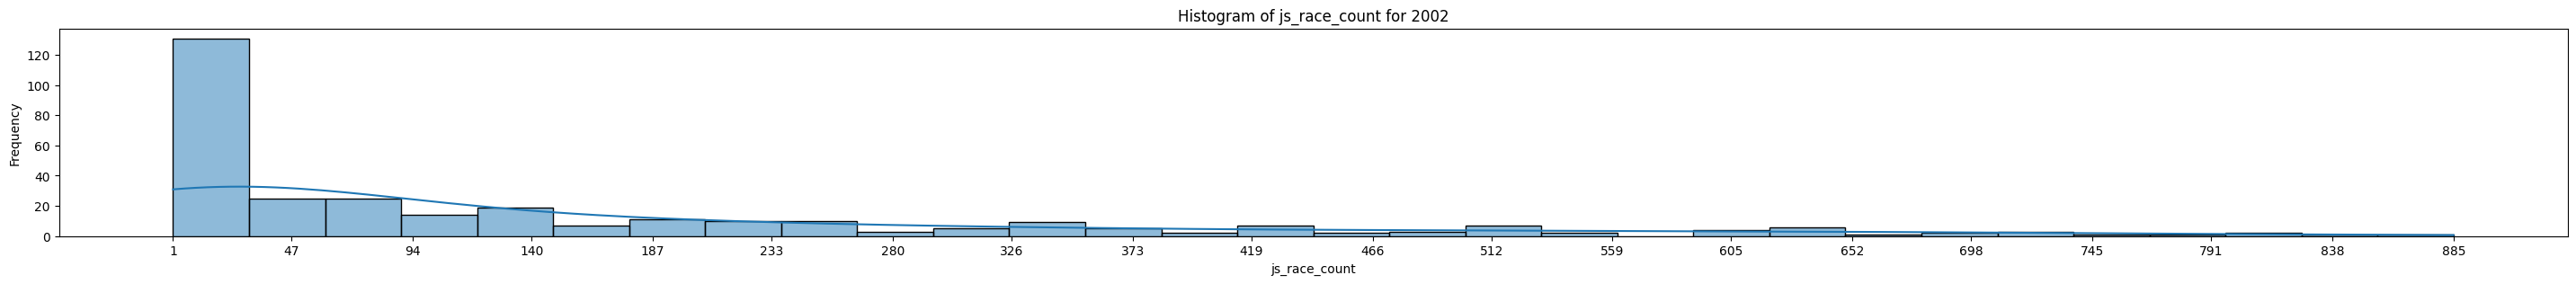

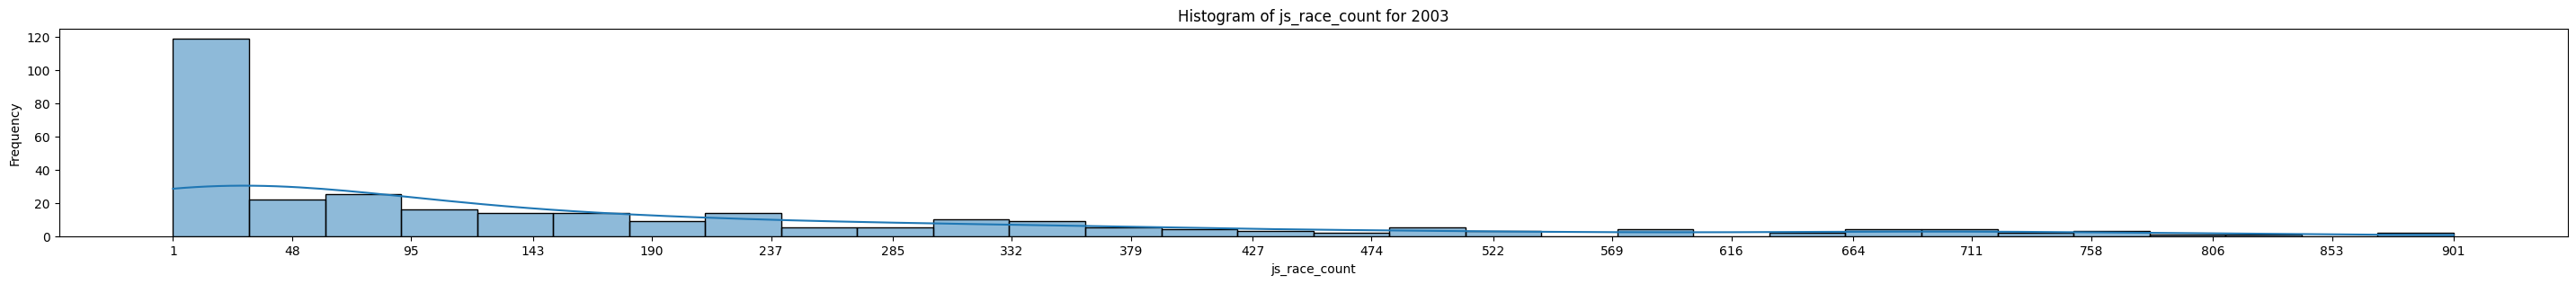

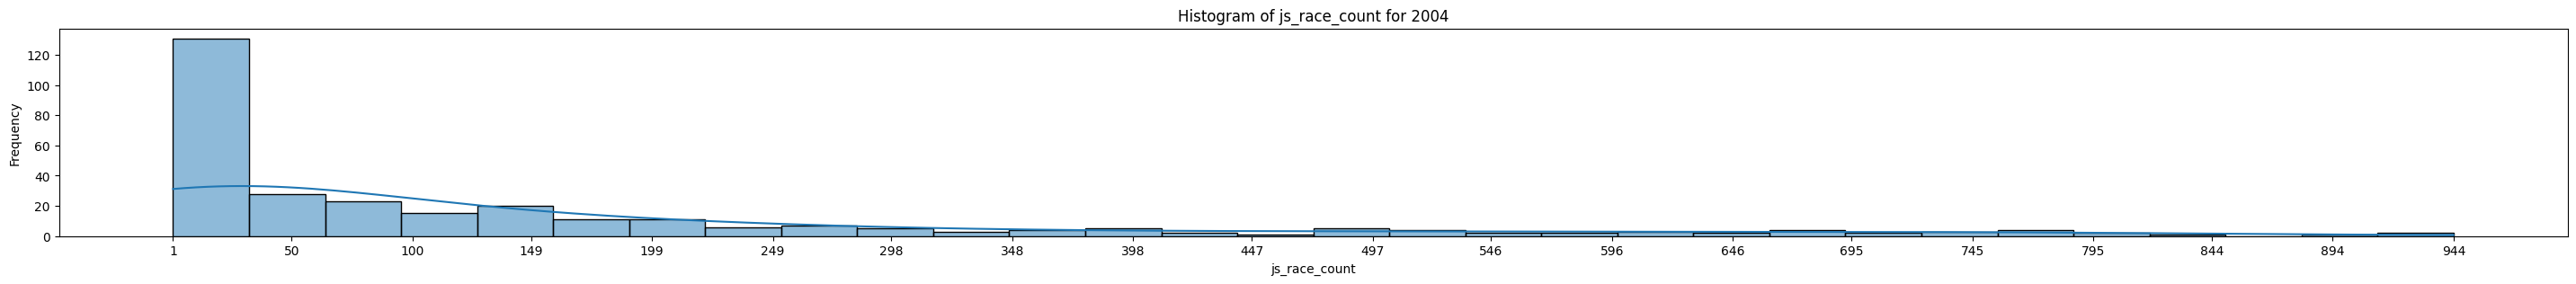

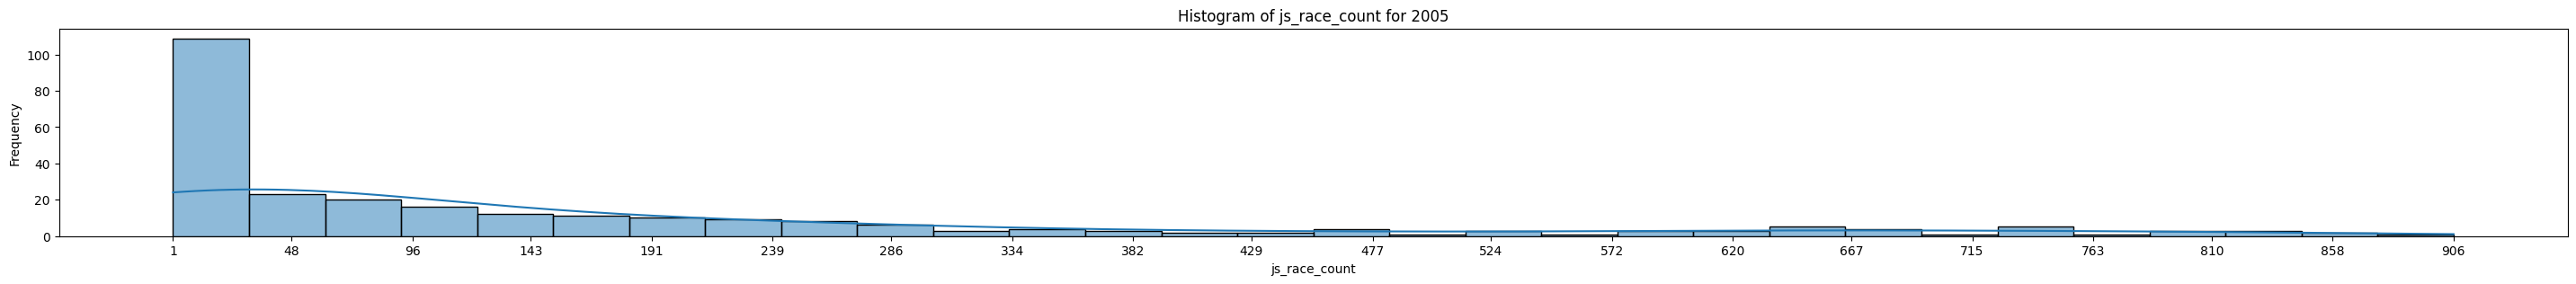

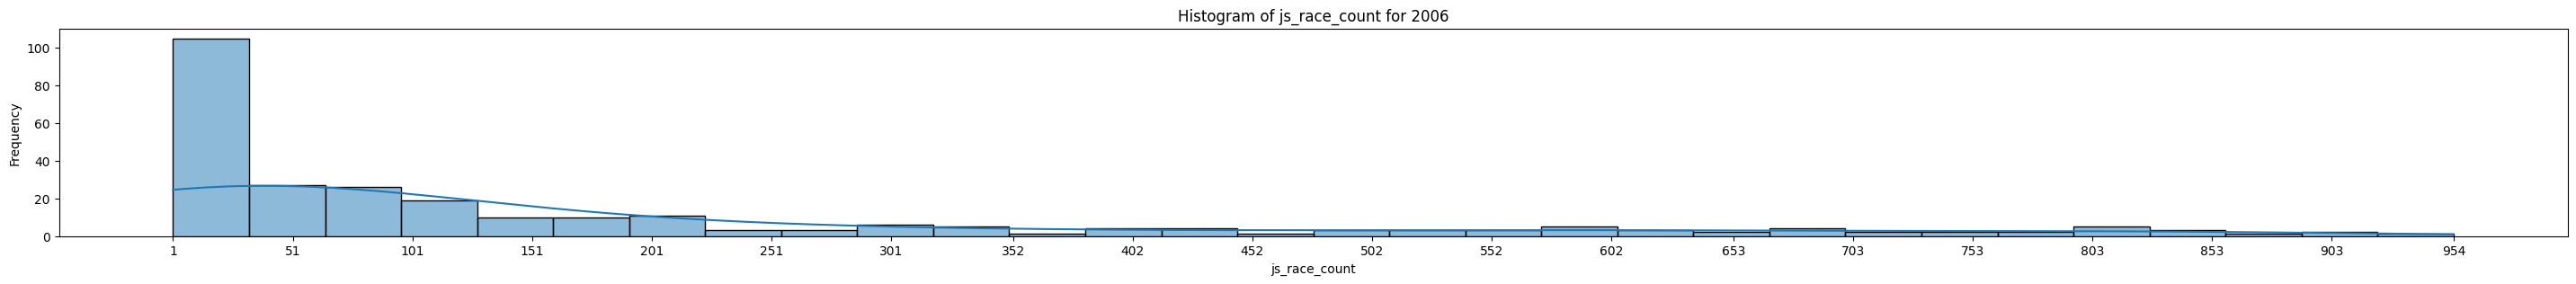

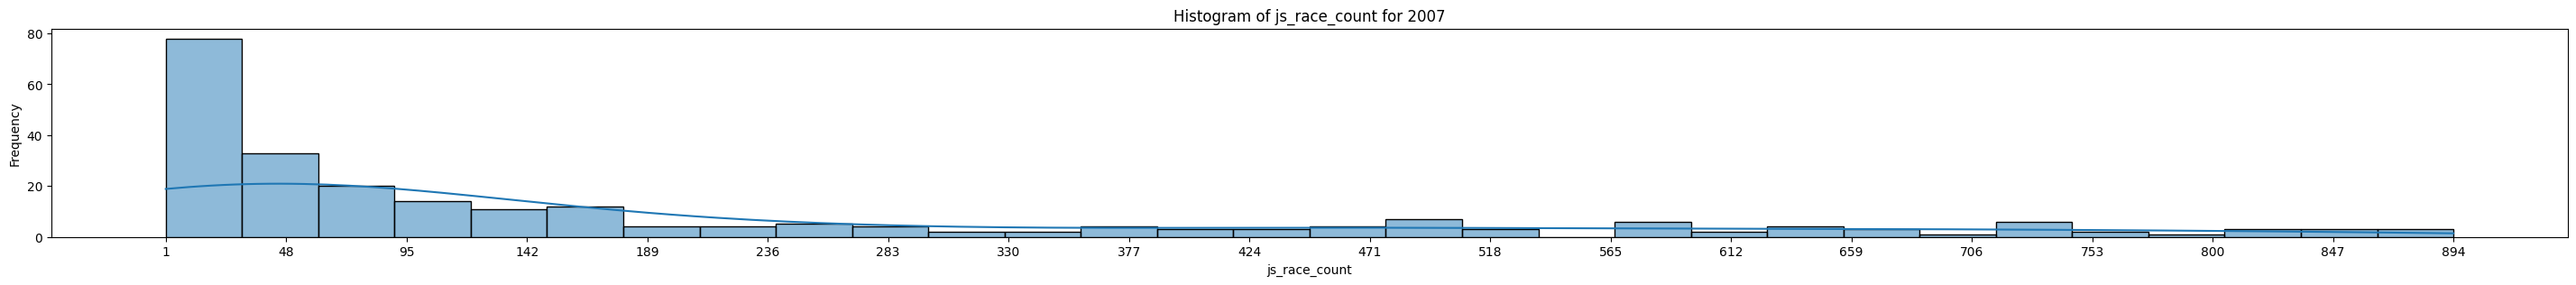

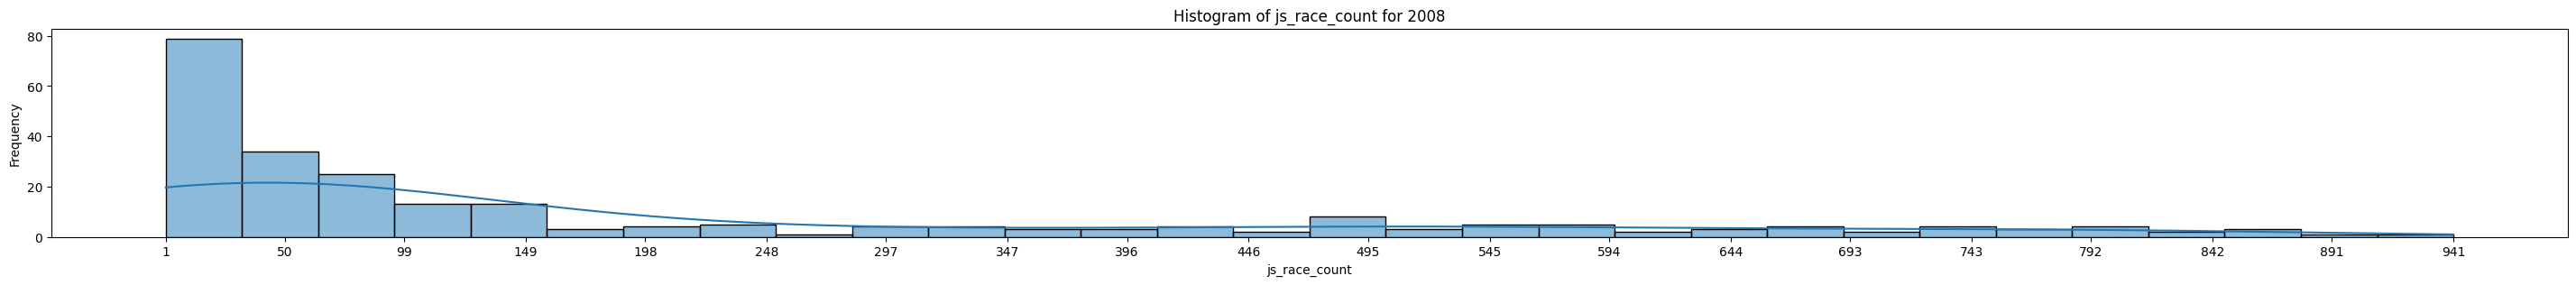

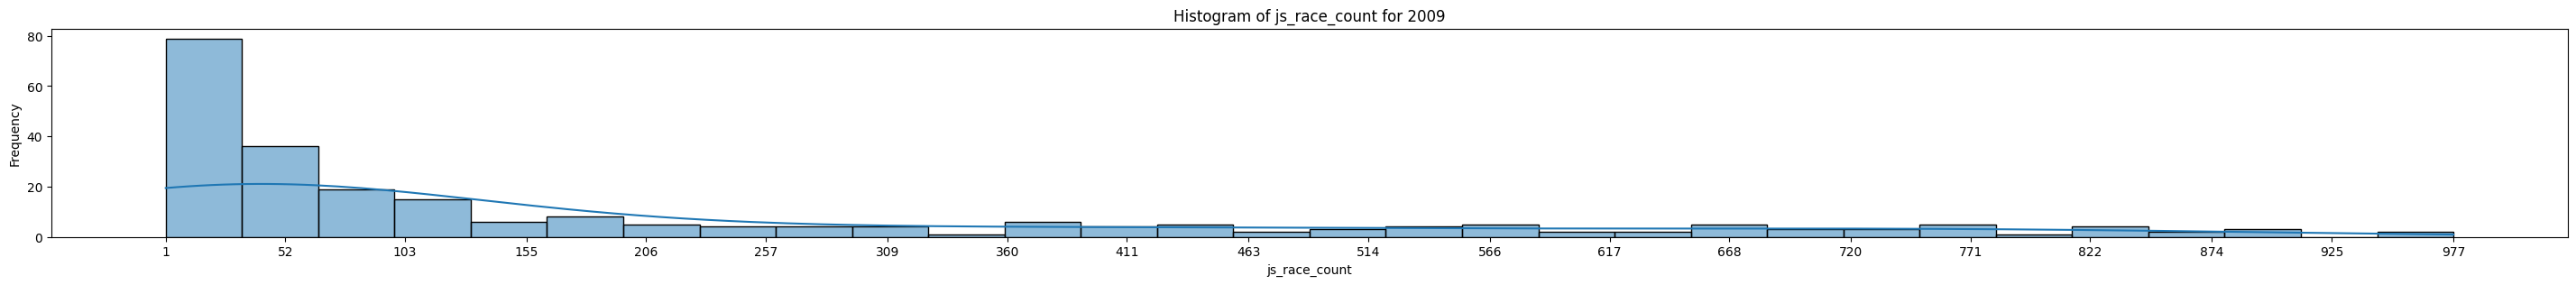

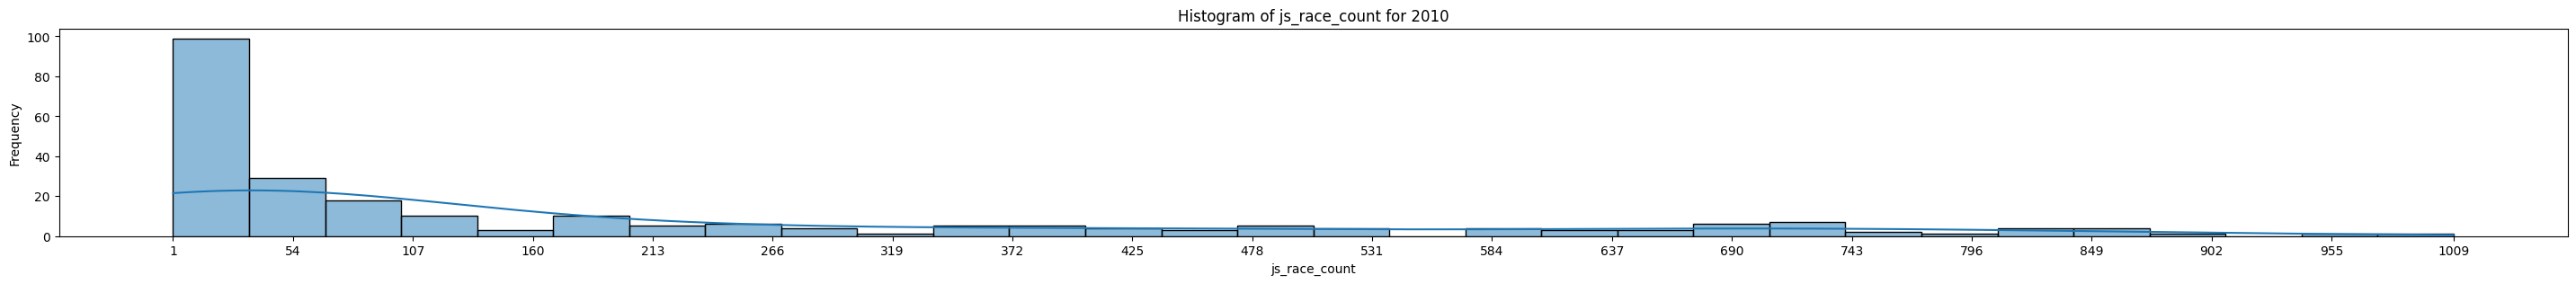

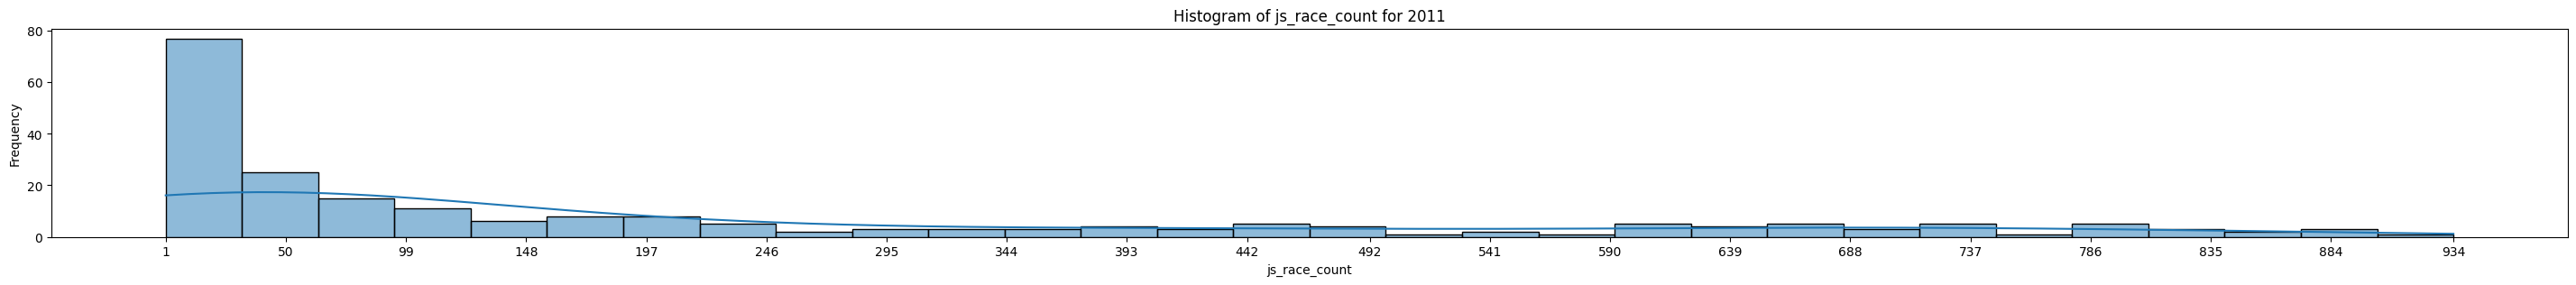

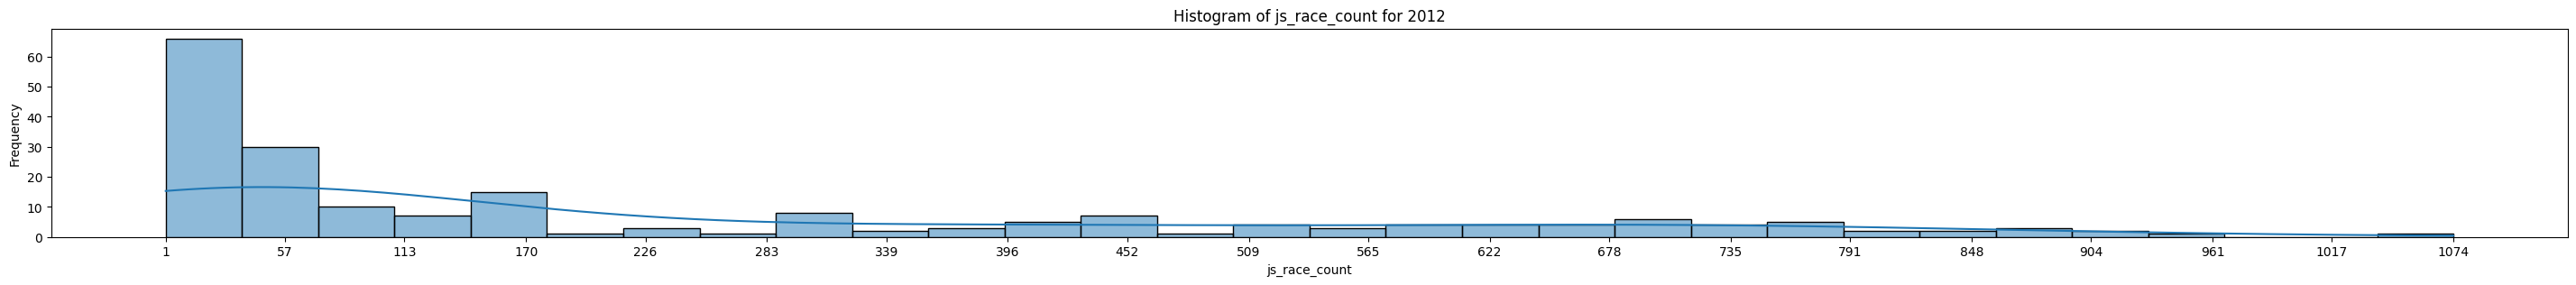

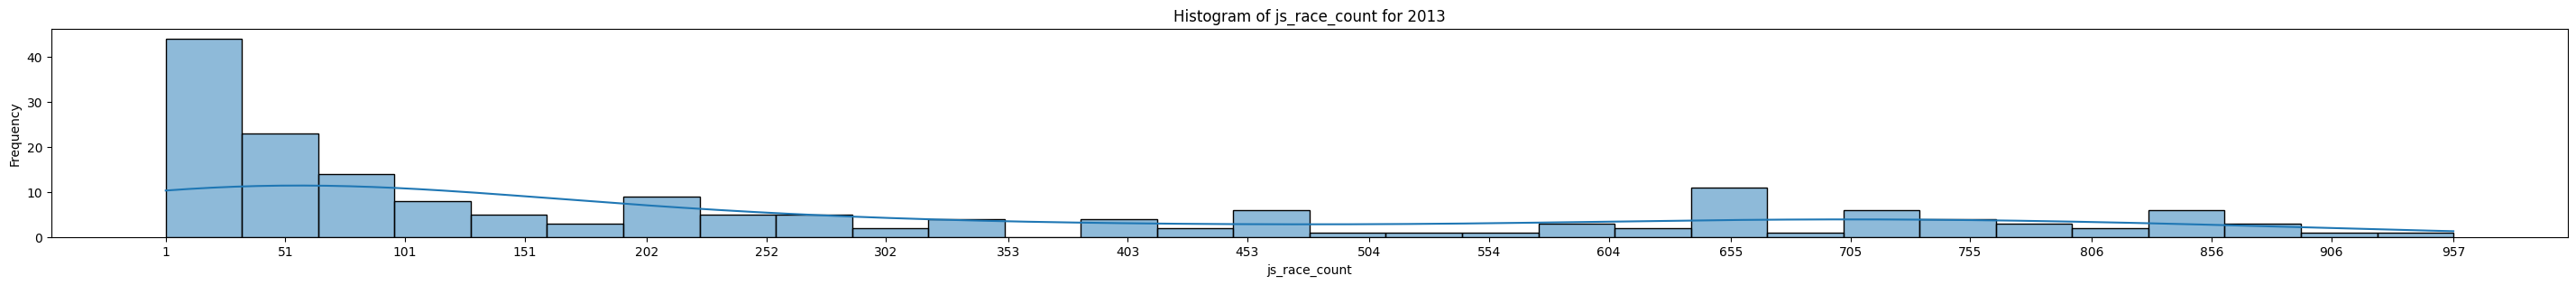

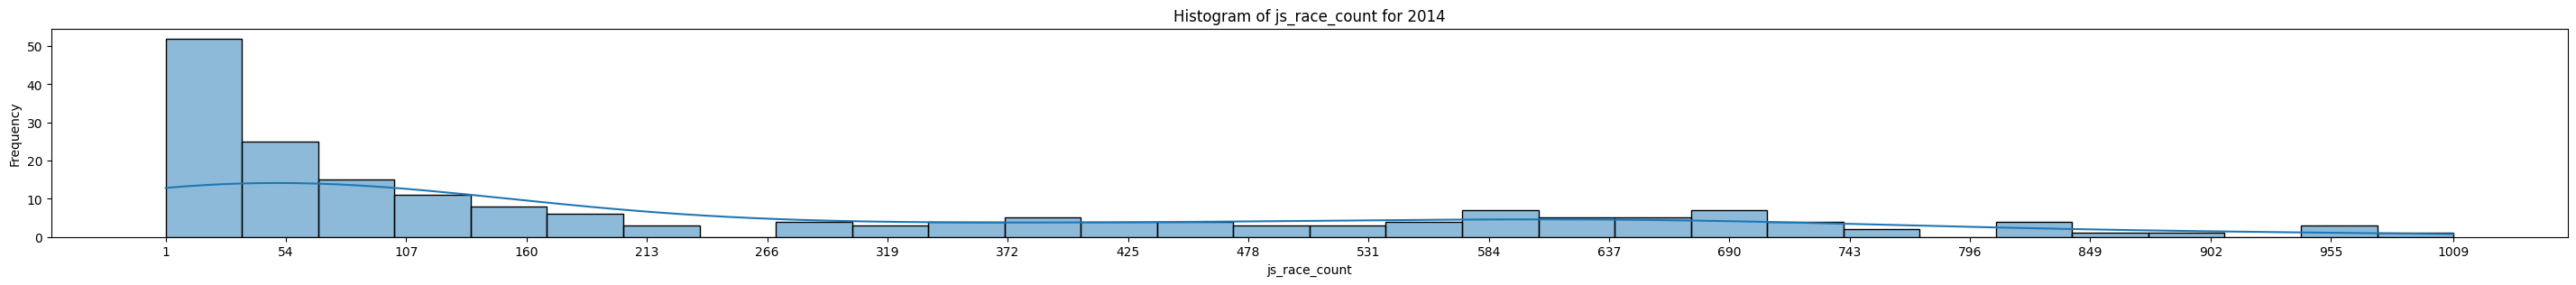

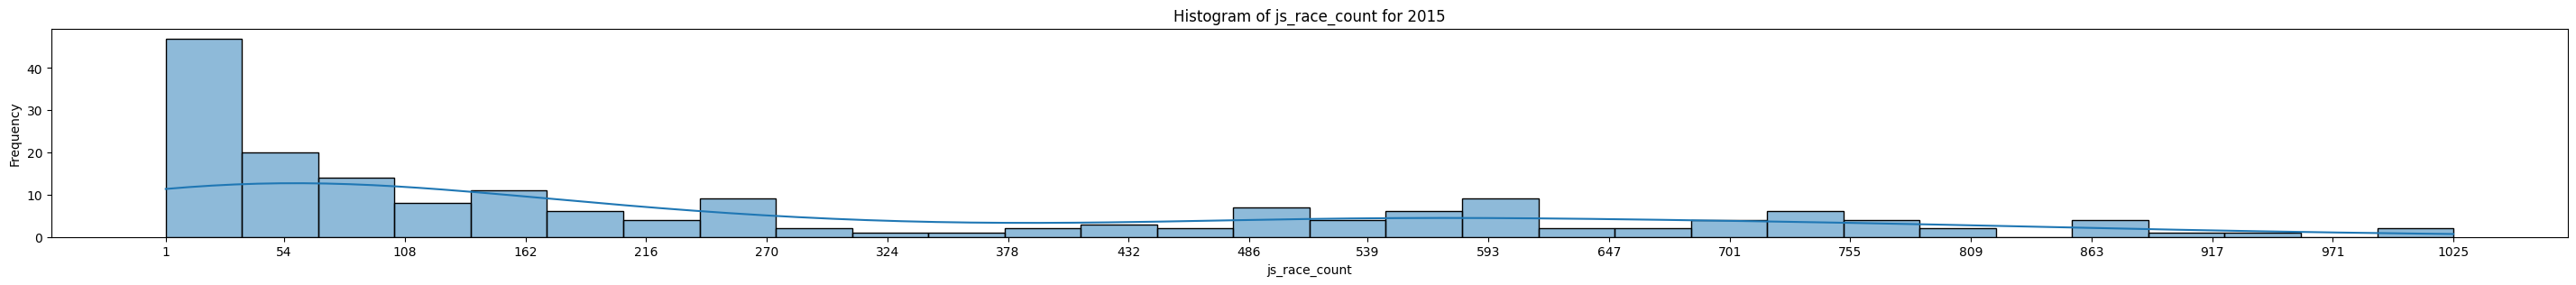

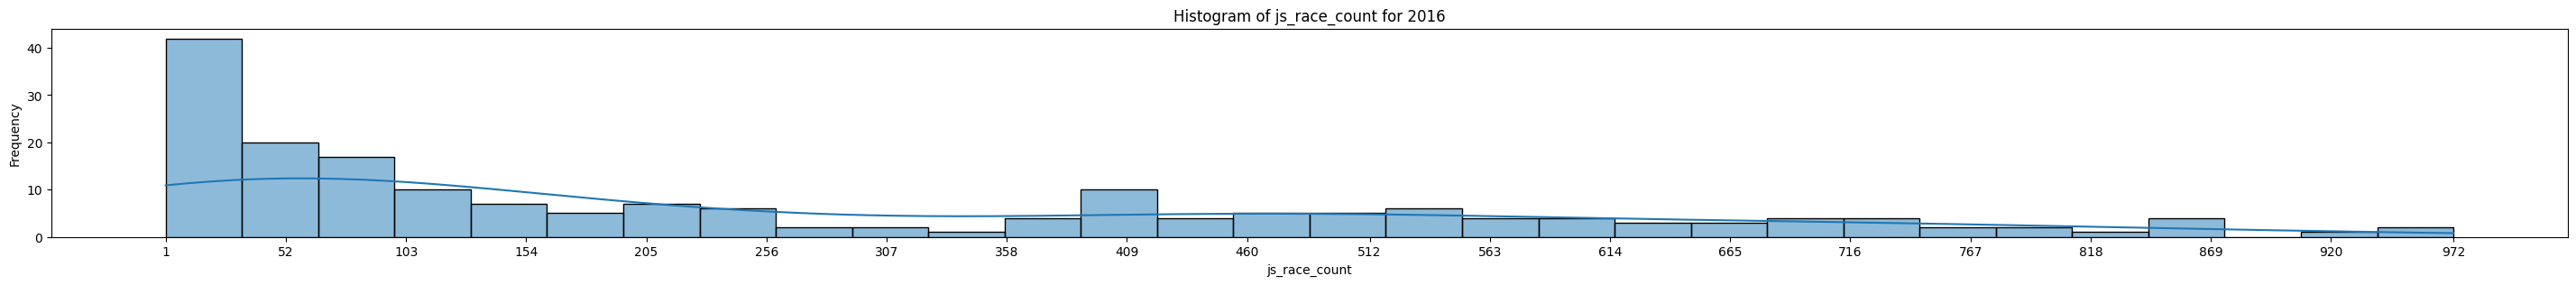

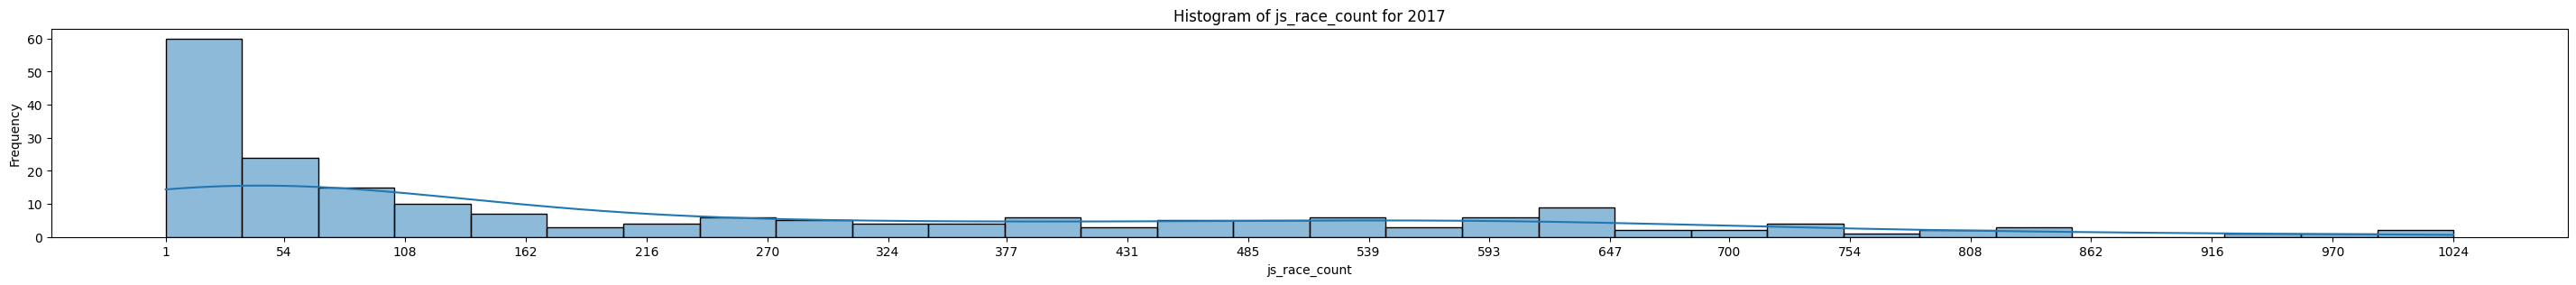

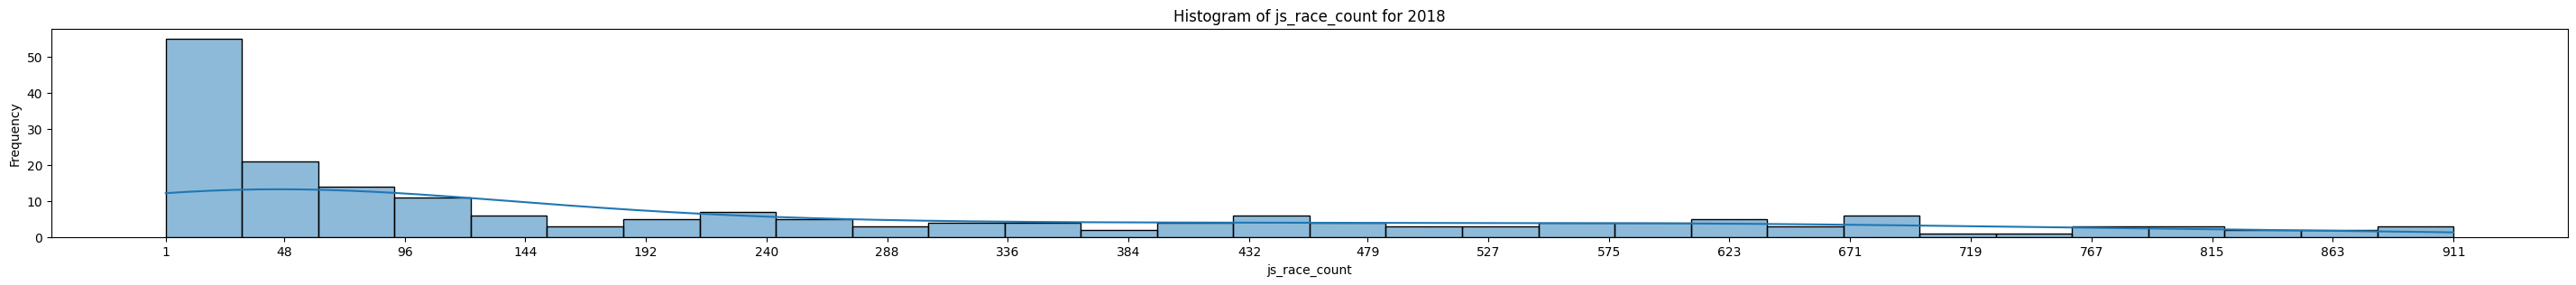

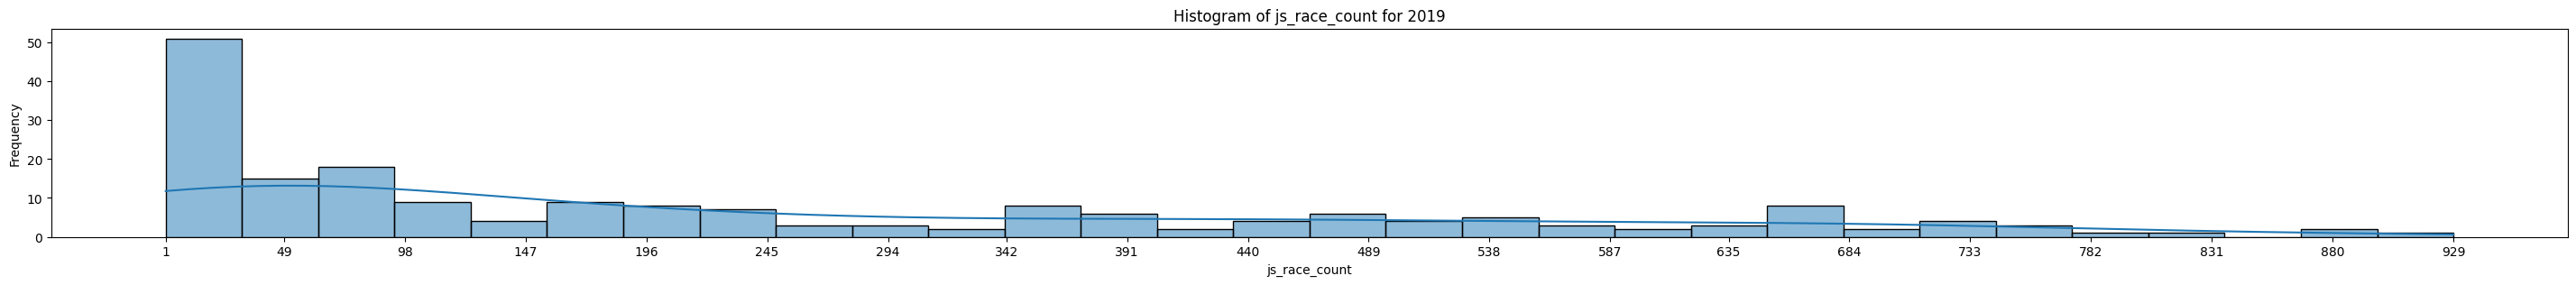

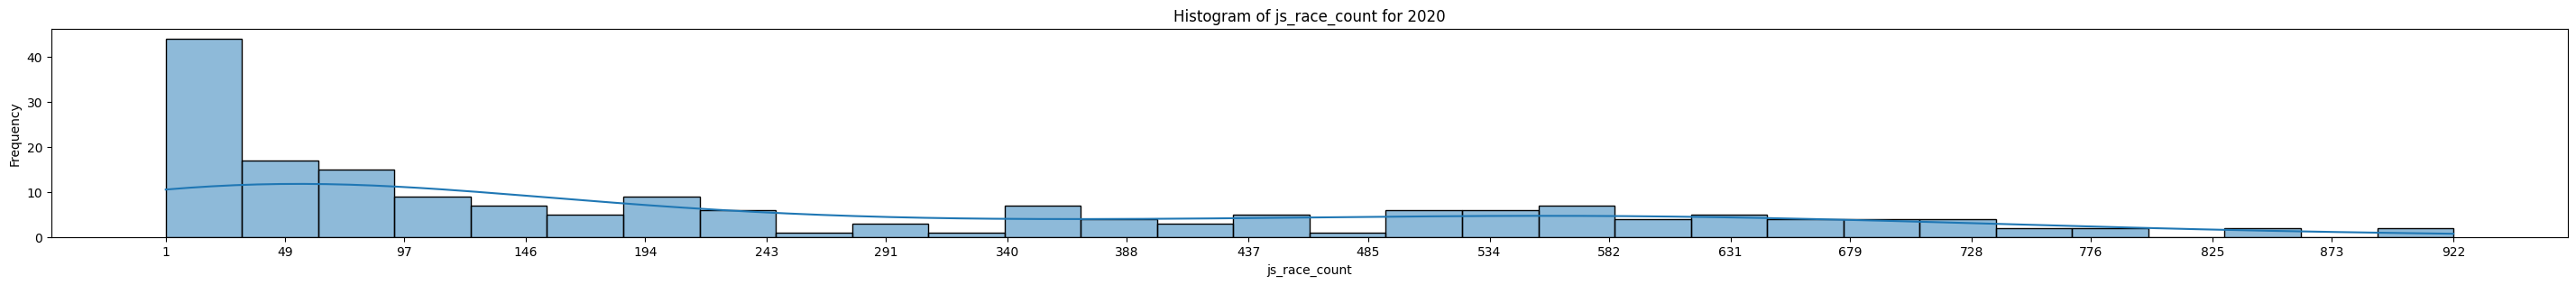

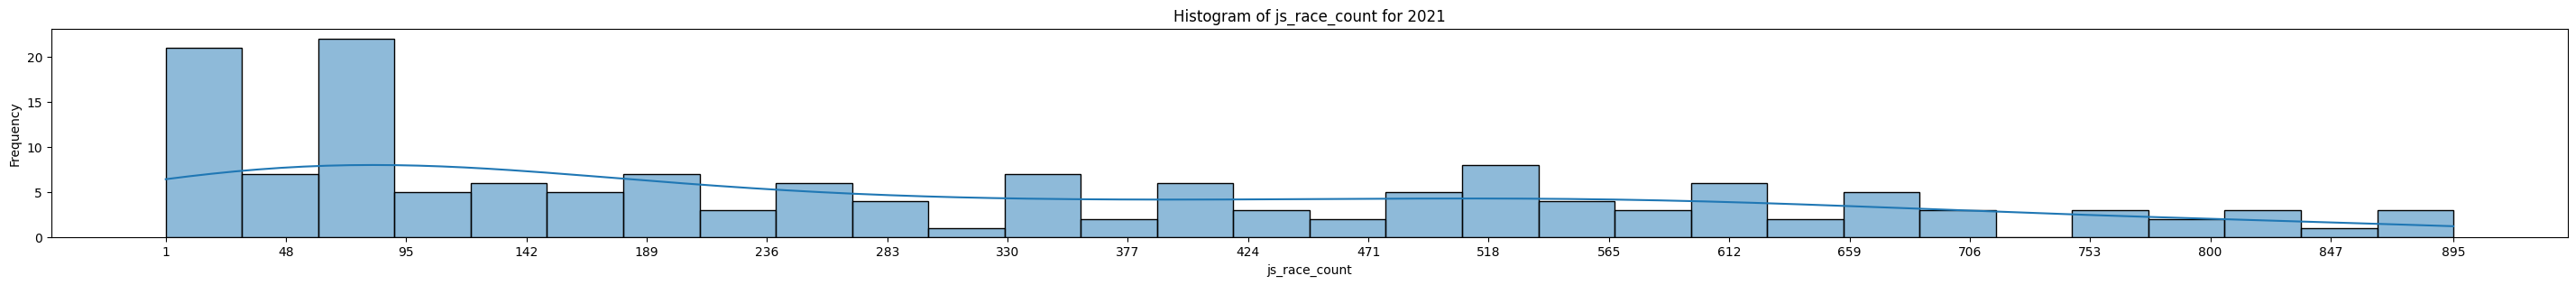

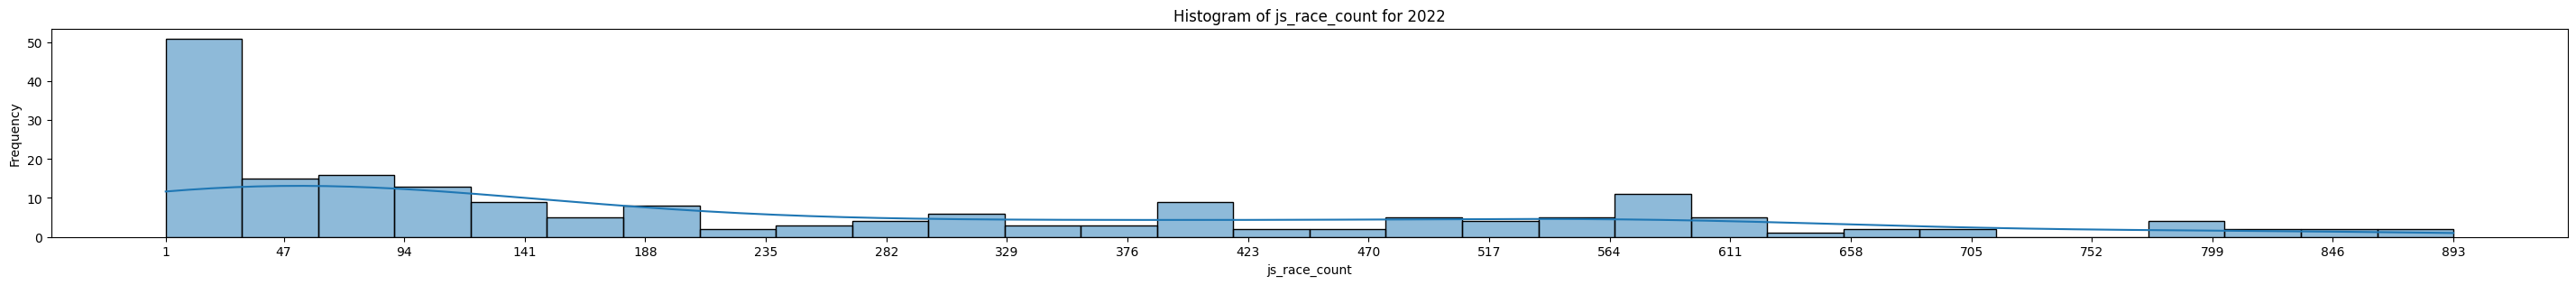

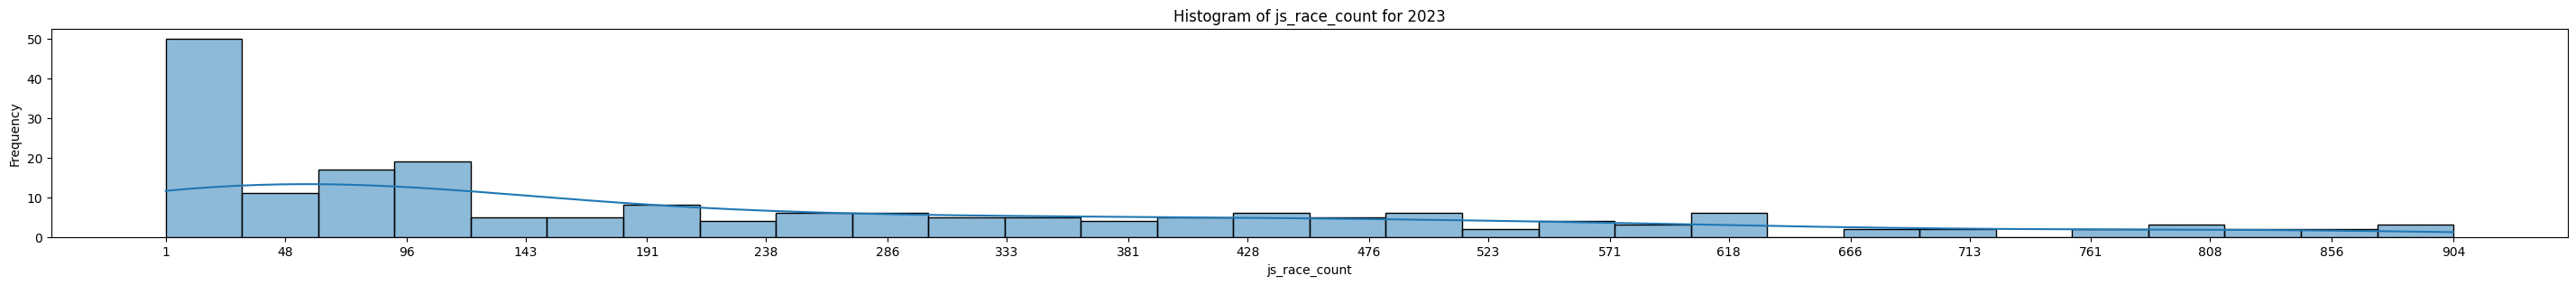

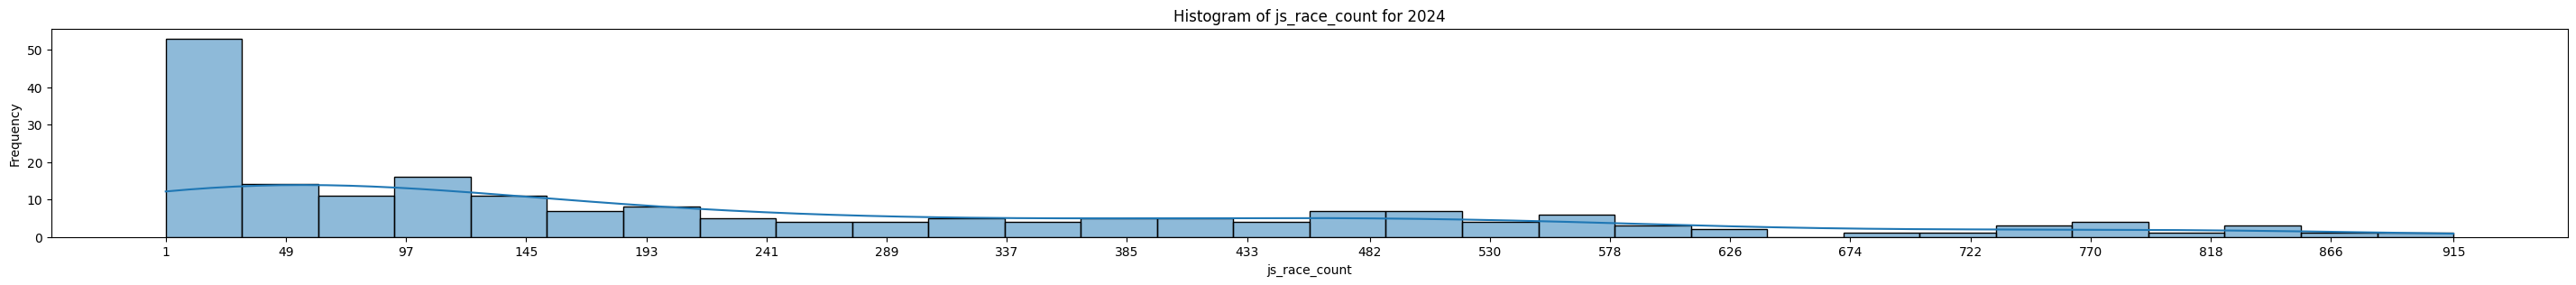

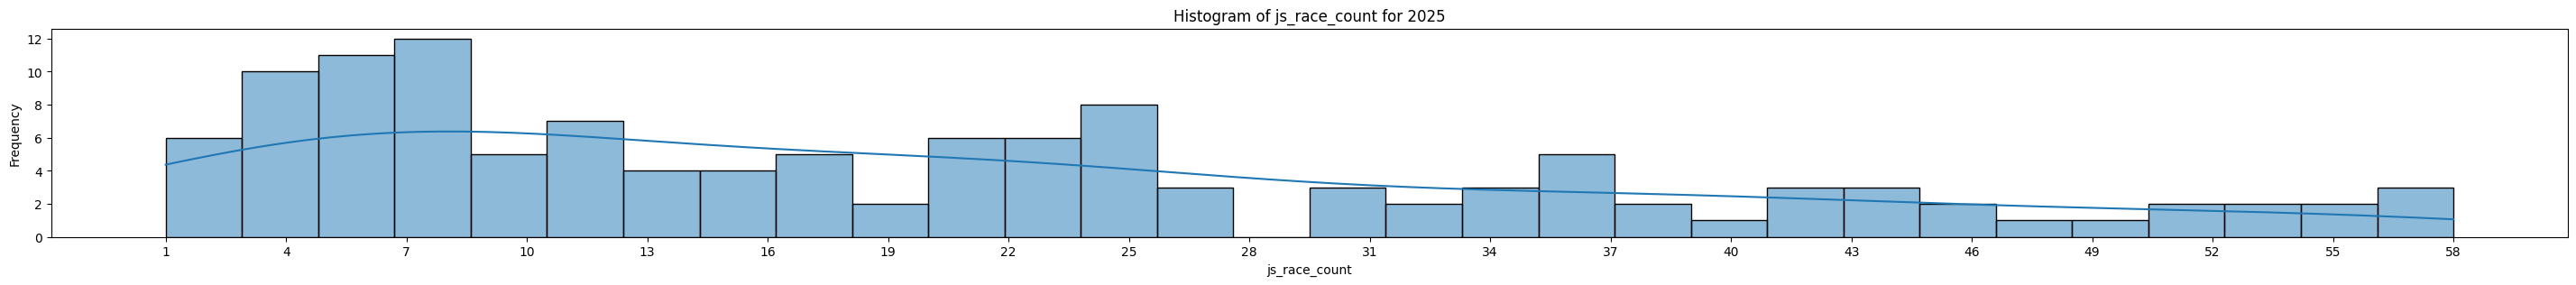

In [26]:
k_a_util.prepare_pd_on_notebook()
dict_statistics = {}
filepath = f'/content/drive/MyDrive/Dev/Kjvan/kjdb_score.accdb'
df_summary = k_a_util.read_table(filepath, table_name)
df_summary = df_summary[df_summary['js_id'] != '00000']
df_summary = df_summary.sort_values(by='js_year')
df_group_y = df_summary.groupby('js_year')

for year, group in df_group_y:
    plt.figure(figsize=(36, 3))
    group['js_race_count'] = group['js_race_count'].astype(int)
    group = group.sort_values(by='js_race_count')

    # ヒストグラムを描画
    sns.histplot(group['js_race_count'], bins=60, kde=True)

    # X軸の目盛りを設定
    max_count = group['js_race_count'].max()
    min_count = group['js_race_count'].min()
    plt.xticks(np.linspace(min_count, max_count, 20, dtype=int))

    plt.title(f'Histogram of js_race_count for {year}')
    plt.xlabel('js_race_count')
    plt.ylabel('Frequency')
    plt.show()